In [1]:
import sys
sys.path.append("/global/homes/a/arosado/photometry/")

In [2]:
import os
import logging
import numpy as np
import fitsio as ft
from matplotlib import pyplot as plt

from photometry import TargetSelection, utils, setup_logging
from photometry import Catalogue, HealpixDensity

logger = logging.getLogger('DA02')
setup_logging()
plot_dir = '/global/homes/a/arosado/legacysim_runs/DA02/plots'
run = 'north'

In [3]:
output_dir = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run)
injected_fn = os.path.join(output_dir,'file0_rs0_skip0','injected.fits')

In [4]:
adematti_legacysim_fn = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged','adematti_matched_input.fits')
legacysim_fn = os.path.join(os.getenv('CSCRATCH'),'legacysim','dr9','DA02',run,'file0_rs0_skip0','merged','matched_input.fits')

Get bricks that are same for both runs

In [5]:
a_legacysim = ft.FITS(adematti_legacysim_fn)[1]
legacysim = ft.FITS(legacysim_fn)[1]

In [6]:
my_bricks = np.unique(legacysim['input_brickname'][:])
adematti_bricks = np.unique(a_legacysim['input_brickname'][:])
mask = np.isin(my_bricks, adematti_bricks)
bricks2use = my_bricks[mask]
a_mask = np.isin(adematti_bricks, my_bricks)
a_bricks2use = adematti_bricks[a_mask]
print(bricks2use.size,a_bricks2use.size) # shoulf be same

7685 7685


Get inputs with `matched`

In [7]:
print('My run')
mask1 = np.isin(legacysim['input_brickname'][:],bricks2use)
my_input = legacysim['input_brickname'][:]
print('input',my_input.size)
my_input_matched = my_input[legacysim['matched'][:]]
print('output',my_input_matched.size)

My run
input 4222391
output 2931026


In [8]:
print('My run: same bricks')
#mask = np.isin(legacysim['input_brickname'][:],bricks2use)
my_input = legacysim['input_brickname'][:][mask1]
print('input',my_input.size)
my_input_matched = my_input[legacysim['matched'][:][mask1]]
print('output',my_input_matched.size)

My run: same bricks
input 4153756
output 2883278


In [9]:
print("Arnaud's run")
mask2 = np.isin(a_legacysim['input_brickname'][:],bricks2use)
a_input = a_legacysim['input_brickname'][:]
print('input',a_input.size)
a_input_matched = a_input[a_legacysim['matched'][:]]
print('output',a_input_matched.size)

Arnaud's run
input 5592566
output 3858719


In [10]:
print("Arnaud's run: same bricks")
#mask = np.isin(a_legacysim['input_brickname'][:],bricks2use)
a_input = a_legacysim['input_brickname'][:][mask2]
print('input',a_input.size)
a_input_matched = a_input[a_legacysim['matched'][:][mask2]]
print('output',a_input_matched.size)

Arnaud's run: same bricks
input 4153756
output 2883122


Check if input positons are the same

In [11]:
pos = {'ra':np.sort(legacysim['input_ra'][:][mask1]), 'dec':np.sort(legacysim['input_dec'][:][mask1])}
a_pos = {'ra':np.sort(a_legacysim['input_ra'][:][mask2]), 'dec':np.sort(a_legacysim['input_dec'][:][mask2])}
print(pos['ra'].size,a_pos['ra'].size)

4153756 4153756


In [12]:
pos

{'ra': array([183.89183516, 183.89187024, 183.8919053 , ..., 255.87414972,
        255.87437472, 255.87460008]),
 'dec': array([32.38460473, 32.38460481, 32.38460558, ..., 66.11528946,
        66.11529376, 66.11529377])}

In [13]:
a_pos

{'ra': array([183.89183516, 183.89187024, 183.8919053 , ..., 255.8740343 ,
        255.87425921, 255.87448448]),
 'dec': array([32.38460334, 32.38460341, 32.38460403, ..., 66.1152911 ,
        66.1152911 , 66.11529327])}

In [14]:
delra = pos['ra'] - a_pos['ra']
#plt.hist(delra)
plt.show()
delra = abs(delra)

print(delra.min(),delra.max())
deldec = pos['dec'] - a_pos['dec']
#plt.hist(deldec)
plt.show()
deldec = abs(deldec)

print(deldec.min(),deldec.max())

0.0 0.00017044809817434725
0.0 6.573454438552062e-05


In [15]:
start = 0
end = pos['ra'].size
print(np.array_equal(pos['ra'][start:end],a_pos['ra'][start:end]),np.array_equal(pos['dec'][start:end],a_pos['dec'][start:end]))

False False


In [16]:
sort1 = np.argsort(legacysim['input_brickname'][:][mask1])
legacysim['input_brickname'][:][mask1][sort1]

array(['1840p335', '1840p335', '1840p335', ..., '2556p440', '2556p440',
       '2556p440'], dtype='<U8')

In [17]:
sort2 = np.argsort(a_legacysim['input_brickname'][:][mask2])
a_legacysim['input_brickname'][:][mask2][sort2]

array(['1840p335', '1840p335', '1840p335', ..., '2556p440', '2556p440',
       '2556p440'], dtype='<U8')

In [18]:
pos = {'ra':legacysim['input_ra'][:][mask1][sort1], 'dec':legacysim['input_dec'][:][mask1][sort1]}
a_pos = {'ra':a_legacysim['input_ra'][:][mask2][sort2], 'dec':a_legacysim['input_dec'][:][mask2][sort2]}
print(pos['ra'].size,a_pos['ra'].size)

4153756 4153756


In [19]:
pos

{'ra': array([184.01142046, 184.07424056, 184.06167897, ..., 255.70015687,
        255.49633627, 255.64192752]),
 'dec': array([33.50003027, 33.45810711, 33.45811027, ..., 43.95809022,
        43.95802558, 44.00002871])}

In [20]:
a_pos

{'ra': array([183.89183516, 184.09936372, 184.08680214, ..., 255.70012641,
        255.49630591, 255.65646598]),
 'dec': array([33.61522839, 33.45809697, 33.45810267, ..., 43.95806235,
        43.95799765, 43.99999898])}

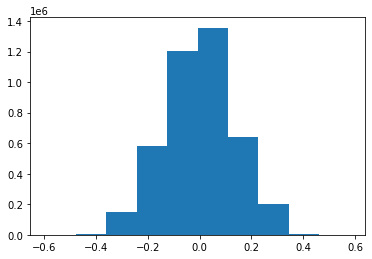

0.0 0.5954750390365575


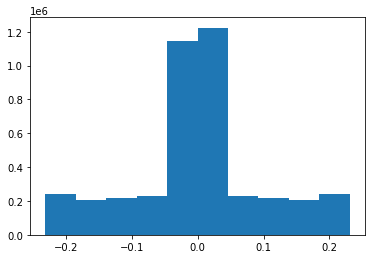

0.0 0.23080023537677619


In [22]:
delra = pos['ra'] - a_pos['ra']
plt.hist(delra)
plt.show()
delra = abs(delra)

print(delra.min(),delra.max())
deldec = pos['dec'] - a_pos['dec']
plt.hist(deldec)
plt.show()
deldec = abs(deldec)

print(deldec.min(),deldec.max())

Check if id is the same for my input and Arnaud's input

In [19]:
a = np.sort(legacysim['input_id'][:][mask1])
a.size

4153756

In [17]:
b =  np.sort(a_legacysim['input_id'][:][mask2])
b.size

4153756

In [19]:
np.array_equal(a,b)

True

In [20]:
np.array_equal(np.unique(a),np.unique(b))

True

In [21]:
a = np.sort(legacysim['input_id'][:][mask1][legacysim['matched'][:][mask1]])
a.size

2883278

In [22]:
b =  np.sort(a_legacysim['input_id'][:][mask2][a_legacysim['matched'][:][mask2]])
b.size

2883122

In [23]:
b.size/a.size

0.99994589491544

looking at seed column

In [15]:
inj = ft.FITS(injected_fn)[1]
a_inj = ft.FITS(output_dir+'/injected.fits')[1]

In [16]:
my_bricks = np.unique(inj['brickname'][:])
adematti_bricks = np.unique(a_inj['brickname'][:])
mask = np.isin(my_bricks, adematti_bricks)
bricks2use = my_bricks[mask]
a_mask = np.isin(adematti_bricks, my_bricks)
a_bricks2use = adematti_bricks[a_mask]
print(bricks2use.size,a_bricks2use.size, bricks2use.size) # shoulf be same

13718 13718 13718


In [17]:
#inj = ft.FITS(injected_fn)[1]
seed = inj['seed'][:]
m1 = np.isin(inj['brickname'][:],bricks2use)
print(seed.size, seed[m1].size)

7547545 7414593


In [18]:
#a_inj = ft.FITS(output_dir+'/injected.fits')[1]
a_seed = a_inj['seed'][:]
m2 = np.isin(a_inj['brickname'][:],bricks2use)
print(a_seed.size, a_seed[m2].size)

7415673 7414593


In [19]:
print('my run: ', np.sort(seed[m1]))
print('Arnaud run: ', np.sort(a_seed[m2]))
print(seed[m1][seed[m1] == a_seed[m2][0]])

my run:  [       831        840        999 ... 4294966359 4294966406 4294966477]
Arnaud run:  [      1980       2639       2674 ... 4294964443 4294965058 4294965853]
[]


Looking at positions

In [20]:
sort1_ind = np.argsort(inj['brickname'][:][m1])
sort2_ind = np.argsort(a_inj['brickname'][:][m2])

In [21]:
print('my run: ', inj['brickname'][:][m1][sort1_ind])
print('Arnaud run: ',a_inj['brickname'][:][m2][sort2_ind])
np.array_equal(inj['brickname'][:][m1][sort1_ind],a_inj['brickname'][:][m2][sort2_ind])

my run:  ['1840p335' '1840p335' '1840p335' ... '2823p562' '2823p562' '2823p562']
Arnaud run:  ['1840p335' '1840p335' '1840p335' ... '2823p562' '2823p562' '2823p562']


True

In [53]:
#pos = {'ra':inj['ra'][:][m1], 'dec':inj['dec'][:][m1][sort1_ind]}
#a_pos = {'ra':a_inj['ra'][:][m2][sort2_ind], 'dec':a_inj['dec'][:][m2][sort2_ind]}
pos = {'ra':np.sort(inj['ra'][:][m1]), 'dec':np.sort(inj['dec'][:][m1])}
a_pos = {'ra':np.sort(a_inj['ra'][:][m2]), 'dec':np.sort(a_inj['dec'][:][m2])}

In [54]:
pos['ra'].size

7414593

In [55]:
a_pos['ra'].size

7414593

In [56]:
print(np.array_equal(pos['ra'],a_pos['ra']),np.array_equal(pos['dec'],a_pos['dec']))

False False


In [35]:
pos['ra'][-1]

{'ra': array([184.1808915 , 183.97368702, 183.98626077, ..., 282.43592217,
        282.17212254, 282.10531952]),
 'dec': array([33.38466941, 33.54193692, 33.54194263, ..., 56.20801065,
        56.20799062, 56.3650967 ])}

In [36]:
a_pos['ra'][-1]

{'ra': array([184.1808915 , 183.97368702, 183.98626077, ..., 282.43589244,
        282.17209256, 282.10528936]),
 'dec': array([33.38466941, 33.54193692, 33.54194263, ..., 56.20804648,
        56.20802639, 56.36513245])}

In [42]:
col = 'ra'
inj[col][:].size == np.unique(inj[col][:]).size

True

In [39]:
inj


  file: /global/cscratch1/sd/arosado/legacysim/dr9/DA02/north/file0_rs0_skip0/injected.fits
  extension: 1
  type: BINARY_TBL
  rows: 7547545
  column info:
    bx                  f8  
    by                  f8  
    ra                  f8  
    dec                 f8  
    id                  i8  
    brickname           S8  
    photsys             S1  
    objid               i4  
    g                   f4  
    r                   f4  
    z                   f4  
    gfiber              f4  
    rfiber              f4  
    zfiber              f4  
    shape_r             f4  
    sersic              f4  
    shape_ba            f4  
    shape_phi           f8  
    hsc_object_id       i8  
    hsc_demp_photoz_best
                        f4  
    hsc_mizuki_photoz_best
                        f4  
    mw_transmission_g
                        f8  
    flux_g              f8  
    mw_transmission_r
                        f8  
    flux_r              f8  
    mw_transmission_z

Unpickle my run

In [3]:
# Step 1
import pickle
 
# Step 2
with open('my_dens_concat', 'rb') as density_variation_file:
 
    # Step 3
    my_dens = pickle.load(density_variation_file)
 
    # After adematti_dens is read from file
    print(my_dens)

In [4]:
# Step 1
import pickle
 
# Step 2
with open('my_others_concat', 'rb') as others_file:
 
    # Step 3
    my_others = pickle.load(others_file)
 
    # After adematti_dens is read from file
    print(my_others)

[<photometry.density_variations.HealpixDensity object at 0x1555513d1fd0>, <photometry.density_variations.HealpixDensity object at 0x155524d38070>]


Unpickle Arnaud's run

In [5]:
# Step 1
import pickle
 
# Step 2
with open('adematti_dens_concat', 'rb') as density_variation_file:
 
    # Step 3
    adematti_dens = pickle.load(density_variation_file)
 
    # After adematti_dens is read from file
    print(adematti_dens)

In [6]:
# Step 1
import pickle
 
# Step 2
with open('adematti_others_concat', 'rb') as others_file:
 
    # Step 3
    adematti_others = pickle.load(others_file)
 
    # After adematti_dens is read from file
    print(adematti_others)

[<photometry.density_variations.HealpixDensity object at 0x1555513da8e0>, <photometry.density_variations.HealpixDensity object at 0x155524d38b20>]


In [7]:
adematti_others[0]

In [8]:
props = ['EBV',
 'GALDEPTH_G',
 'GALDEPTH_R',
 'GALDEPTH_Z',
 'STARDENS',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_Z']

labels = ['DR9', 'legacysim (my run)']#, 'legacysim $n = 1$']
adematti_labels = ['DR9', "legacysim (Arnaud's run)"]#, 'legacysim $n = 1$']
adematti_colors = ['k','brown']

[ 000126.59 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0199.
[ 000126.60 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0205.
[ 000126.61 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0199.
[ 000126.61 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in EBV plot: 0.0201.
[ 000126.63 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0131.
[ 000126.63 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0147.
[ 000126.64 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0131.
[ 000126.64 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_G plot: 0.0140.
[ 000126.65 ]: 06-05 16:41  HealpixDensity  INFO     Fraction of randoms not included in GALDEPTH_R plot: 0.0139.
[ 

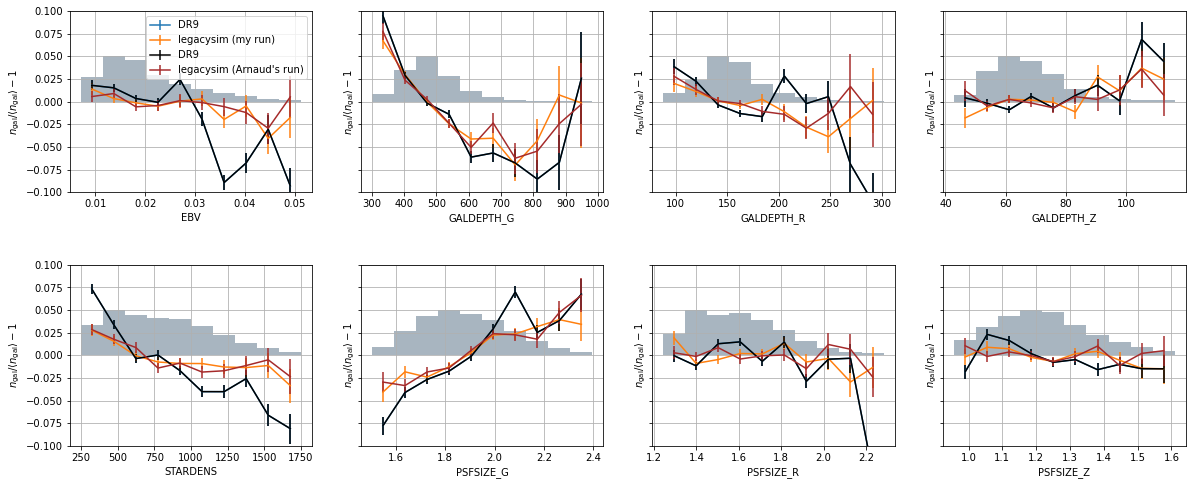

In [10]:
kw = dict(leg_kwargs={},ylim=(-0.1,0.1),xedges={'quantiles':[0.01,0.99]})
fig,lax = plt.subplots(ncols=4,nrows=2,sharex=False,sharey=True,figsize=(20,8))
fig.subplots_adjust(hspace=0.4,wspace=0.2)
lax = lax.flatten()
for iax,prop in enumerate(props):
    my_dens.plot_density_variations(ax=lax[iax],others=[my_others[0]],prop=prop,histos=[my_dens],var_kwargs={'labels':labels if iax==0 else None},**kw)
    adematti_dens.plot_density_variations(ax=lax[iax],others=[adematti_others[0]],prop=prop,histos=[adematti_dens],var_kwargs={'labels':adematti_labels if iax==0 else None, 'colors':adematti_colors},**kw)
filename = os.path.join(plot_dir,'compare_density_{}_concat.png'.format(run))
fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200)
plt.show()